In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# GHG Total

In [50]:
df = pd.read_excel("EN_Annex10_GHG_Econ_Canada.xlsx", sheet_name=4, header=0)
df.head()

,"Table A10-2: GHG Emissions for Canada by Canadian Economic Sector, 1990-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1990,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,...,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
2,NaN,Mt CO2 eq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NATIONAL GHG TOTAL,606.392423,601.582234,619.373944,624.158938,646.089621,664.740944,685.814788,701.480770,708.025177,...,747.495264,742.044099,724.909400,737.606819,747.051952,747.307684,682.282993,693.573738,699.899121,693.911893
4,Oil and Gas,117.325909,118.605443,127.908088,136.525247,142.141756,149.568818,157.441801,158.670467,162.945521,...,227.688928,226.036673,207.983462,216.462111,223.113280,222.352647,204.446686,211.072731,209.400132,207.955495


In [157]:
years = df.iloc[1, 1:].astype(int).tolist()
data = df.iloc[3:, :].copy()
data.columns = ['Sector'] + years
data = data.dropna(subset=["Sector"])

agriculture = data[data["Sector"] == "Agriculture"]
farm = data[data["Sector"] == "On Farm Fuel Use"]
crop = data[data["Sector"] == "Crop Production"]
animal = data[data["Sector"] == "Animal Production"]
total = data[data["Sector"] == "NATIONAL GHG TOTAL"]


In [154]:
share_ag_total = agriculture.set_index("Sector").iloc[:, :] / total.set_index("Sector").iloc[:, :].values * 100
share_ag_total

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Sector,,,,,,,,,,,,,,,,,,,,,
Agriculture,8.366275,8.450384,8.558386,8.706979,8.65592,8.803853,8.766621,8.685565,8.608964,8.522126,...,8.601591,8.856429,9.206398,9.125754,9.242492,9.274217,10.276587,9.996028,10.014386,9.999558


In [110]:
# Shares of farm, crop, animal within agriculture
sub_ag = pd.concat([farm, crop, animal])
share_within_ag = sub_ag.set_index("Sector").iloc[:, :] / agriculture.set_index("Sector").iloc[:, :].values * 100
share_within_ag

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Sector,,,,,,,,,,,,,,,,,,,,,
On Farm Fuel Use,16.145446,15.968167,15.826587,15.554061,14.897791,14.93827,15.433283,16.160975,15.213548,15.285264,...,18.797223,19.271258,19.478377,21.253022,21.5797,21.672,20.151771,20.511598,20.229212,20.519992
Crop Production,18.688995,17.69577,17.530251,18.382739,18.197495,17.797137,18.166141,18.292981,18.799696,18.377166,...,23.567498,24.548518,24.585572,23.110865,23.860341,24.065036,26.340078,25.182941,26.601573,26.857055
Animal Production,65.16556,66.336063,66.643162,66.0632,66.904713,67.264593,66.400576,65.546044,65.986756,66.33757,...,57.635279,56.180223,55.936051,55.636113,54.559959,54.262964,53.508151,54.305462,53.169216,52.622953


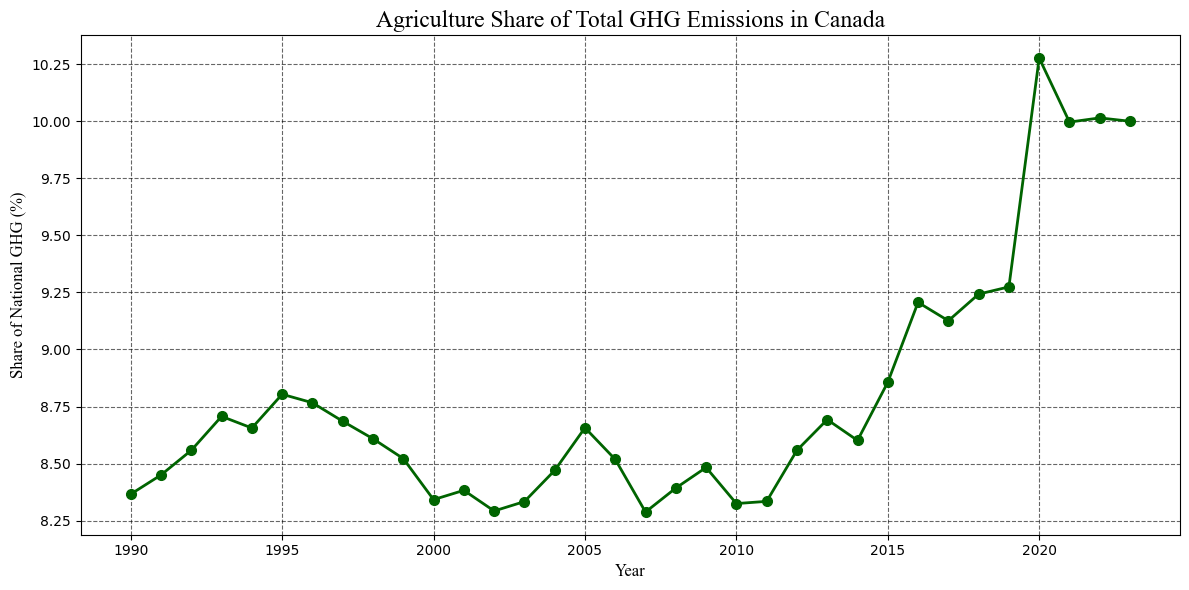

In [155]:
#plt.figure(figsize=(12, 6))
share_ag_total.T.plot(legend=False, figsize=(12, 6), lw=2, c='darkgreen', marker='o', markersize=7)
plt.title("Agriculture Share of Total GHG Emissions in Canada", fontsize=17, fontname='Times New Roman')
plt.ylabel("Share of National GHG (%)", fontsize=12, fontname='Times New Roman')
plt.xlabel("Year", fontsize=12, fontname='Times New Roman')
plt.grid(color='k', ls='--', alpha=0.6)
plt.tight_layout()
#plt.savefig('Agri_share_total_1990.png', dpi=500, bbox_inches='tight')
plt.show()

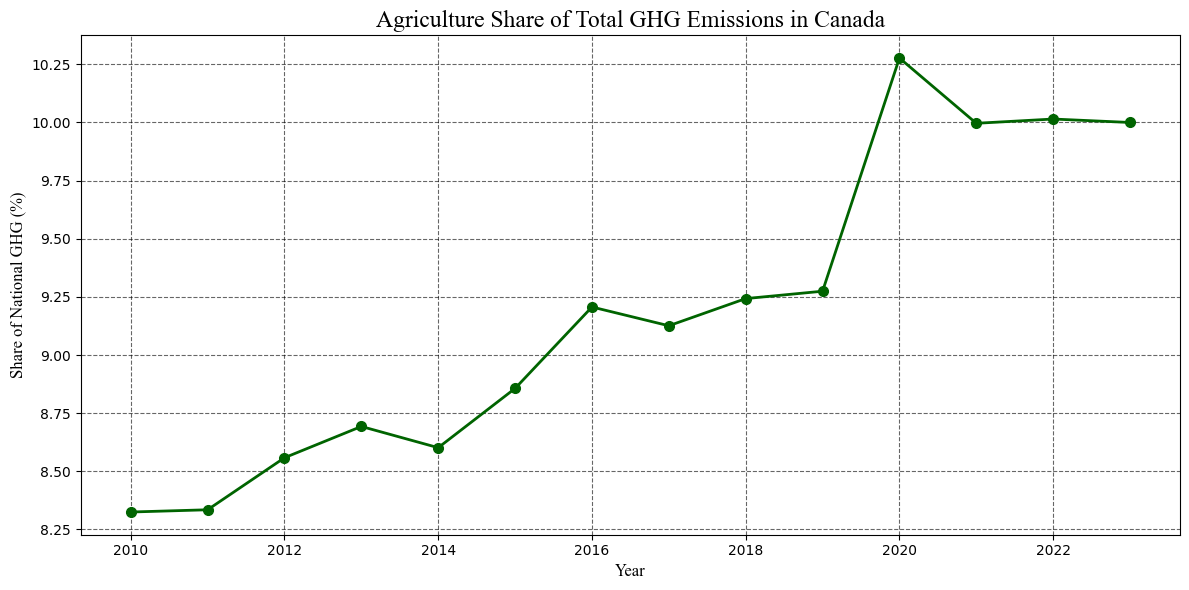

In [156]:
#plt.figure(figsize=(12, 6))
share_ag_total.T.iloc[-14:].plot(legend=False, figsize=(12, 6), lw=2, c='darkgreen', marker='o', markersize=7)
plt.title("Agriculture Share of Total GHG Emissions in Canada", fontsize=17, fontname='Times New Roman')
plt.ylabel("Share of National GHG (%)", fontsize=12, fontname='Times New Roman')
plt.xlabel("Year", fontsize=12, fontname='Times New Roman')
plt.grid(color='k', ls='--', alpha=0.6)
plt.tight_layout()
#plt.savefig('Agri_share_total_2010.png', dpi=500, bbox_inches='tight')
plt.show()

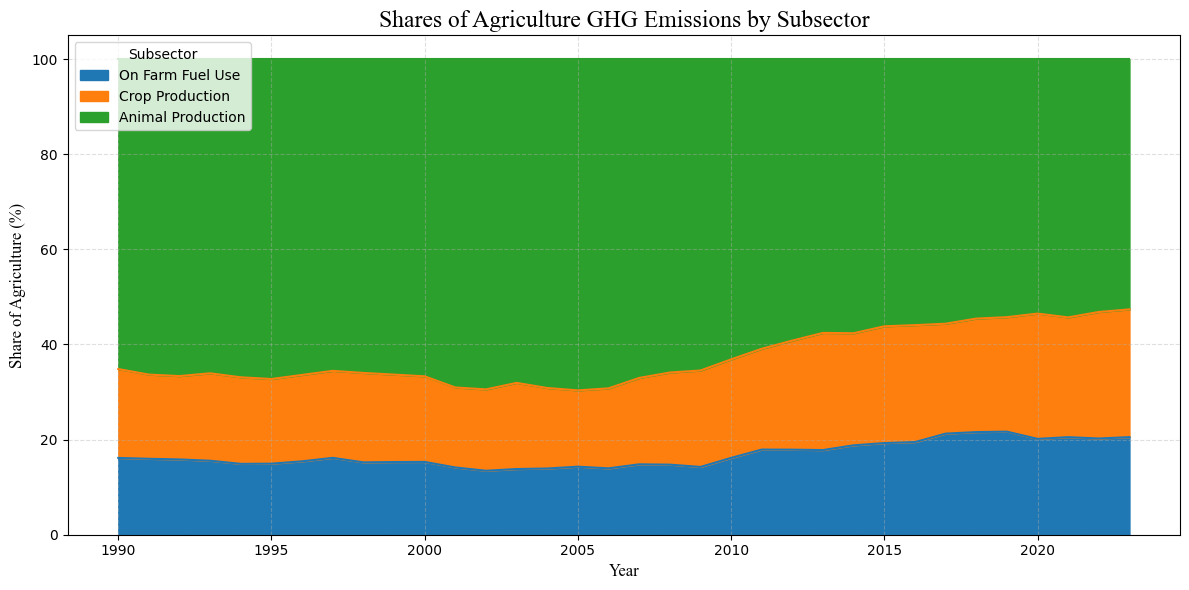

In [151]:
#plt.figure(figsize=(8,5))
share_within_ag.T.plot.area(figsize=(12, 6))
plt.title("Shares of Agriculture GHG Emissions by Subsector", fontsize=17, fontname='Times New Roman')
plt.ylabel("Share of Agriculture (%)", fontsize=12, fontname='Times New Roman')
plt.xlabel("Year", fontsize=12, fontname='Times New Roman')
plt.legend(loc='upper left', title="Subsector")
plt.grid(True, alpha=0.4, ls = '--')
plt.tight_layout()
#plt.savefig('share_within_agri.png', dpi=500, bbox_inches='tight')
plt.show()

In [192]:
len(sheets)

11

# GHG by Provinces

In [17]:
file = "EN_Annex12_GHG_Econ_Prov_Terr.xlsx"

# get all sheet names (provinces)
xls = pd.ExcelFile(file)
sheets = xls.sheet_names   # ['NL','PE','NS',...]
sheets = sheets[4:-3]
results = {}

In [14]:
df = pd.read_excel(file, sheet_name='NL', header=0)
years = df.iloc[1, 1:].astype(int).tolist()
data = df.iloc[3:, :].copy()
data.columns = ['Sector'] + years
data = data.dropna(subset=["Sector"])
# same structure as national
# pick agriculture + subsectors + total
agriculture = data[data["Sector"] == "Agriculture"]
farm = data[data["Sector"] == "On Farm Fuel Use"]
crop = data[data["Sector"] == "Crop Production"]
animal = data[data["Sector"] == "Animal Production"]
total = data[data["Sector"] == "GHG TOTAL"]
share_ag_total = agriculture.set_index("Sector").iloc[:, :] / total.set_index("Sector").iloc[:, :].values * 100
sub_ag = pd.concat([farm, crop, animal])
share_within_ag = sub_ag.set_index("Sector").iloc[:, :] / agriculture.set_index("Sector").iloc[:, :].values * 10
results[sh] = {
    "share_ag_total": share_ag_total,
    "share_within_ag": share_within_ag}

In [19]:
'''
for sh in sheets:
    print(sh)
    df = pd.read_excel(file, sheet_name=sh, header=0)

    # same structure as national
    years = df.iloc[1, 1:].astype(int).tolist()
    data = df.iloc[3:, :].copy()
    data.columns = ['Sector'] + years
    data = data.dropna(subset=["Sector"])

    # pick agriculture + subsectors + total
    agriculture = data[data["Sector"] == "Agriculture"]
    farm = data[data["Sector"] == "On Farm Fuel Use"]
    crop = data[data["Sector"] == "Crop Production"]
    animal = data[data["Sector"] == "Animal Production"]
    total = data[data["Sector"] == "GHG TOTAL"]

    # shares
    share_ag_total = agriculture.set_index("Sector").iloc[:, :] / total.set_index("Sector").iloc[:, :].values * 100
    sub_ag = pd.concat([farm, crop, animal])
    share_within_ag = sub_ag.set_index("Sector").iloc[:, :] / agriculture.set_index("Sector").iloc[:, :].values * 100

    # store in dictionary
    results[sh] = {
        "share_ag_total": share_ag_total,
        "share_within_ag": share_within_ag
    }
    
    prov = "NS"
    results[sh]["share_ag_total"].T.plot(legend=False, figsize=(10,5), lw=2, marker='o')
    plt.title(f"Agriculture Share of Total GHG Emissions in {sh}")
    plt.ylabel("Share of Provincial GHG (%)")
    plt.xlabel("Year")
    plt.grid(True, ls='--', alpha=0.5)
    plt.show()

    results[prov]["share_within_ag"].T.plot.area(figsize=(10,5))
    plt.title(f"Shares of Agriculture GHG Emissions by Subsector in {sh}")
    plt.ylabel("Share of Agriculture (%)")
    plt.xlabel("Year")
    plt.legend(title="Subsector")
    plt.tight_layout()
    plt.show()

'''

'\nfor sh in sheets:\n    print(sh)\n    df = pd.read_excel(file, sheet_name=sh, header=0)\n\n    # same structure as national\n    years = df.iloc[1, 1:].astype(int).tolist()\n    data = df.iloc[3:, :].copy()\n    data.columns = [\'Sector\'] + years\n    data = data.dropna(subset=["Sector"])\n\n    # pick agriculture + subsectors + total\n    agriculture = data[data["Sector"] == "Agriculture"]\n    farm = data[data["Sector"] == "On Farm Fuel Use"]\n    crop = data[data["Sector"] == "Crop Production"]\n    animal = data[data["Sector"] == "Animal Production"]\n    total = data[data["Sector"] == "GHG TOTAL"]\n\n    # shares\n    share_ag_total = agriculture.set_index("Sector").iloc[:, :] / total.set_index("Sector").iloc[:, :].values * 100\n    sub_ag = pd.concat([farm, crop, animal])\n    share_within_ag = sub_ag.set_index("Sector").iloc[:, :] / agriculture.set_index("Sector").iloc[:, :].values * 100\n\n    # store in dictionary\n    results[sh] = {\n        "share_ag_total": share_ag_to

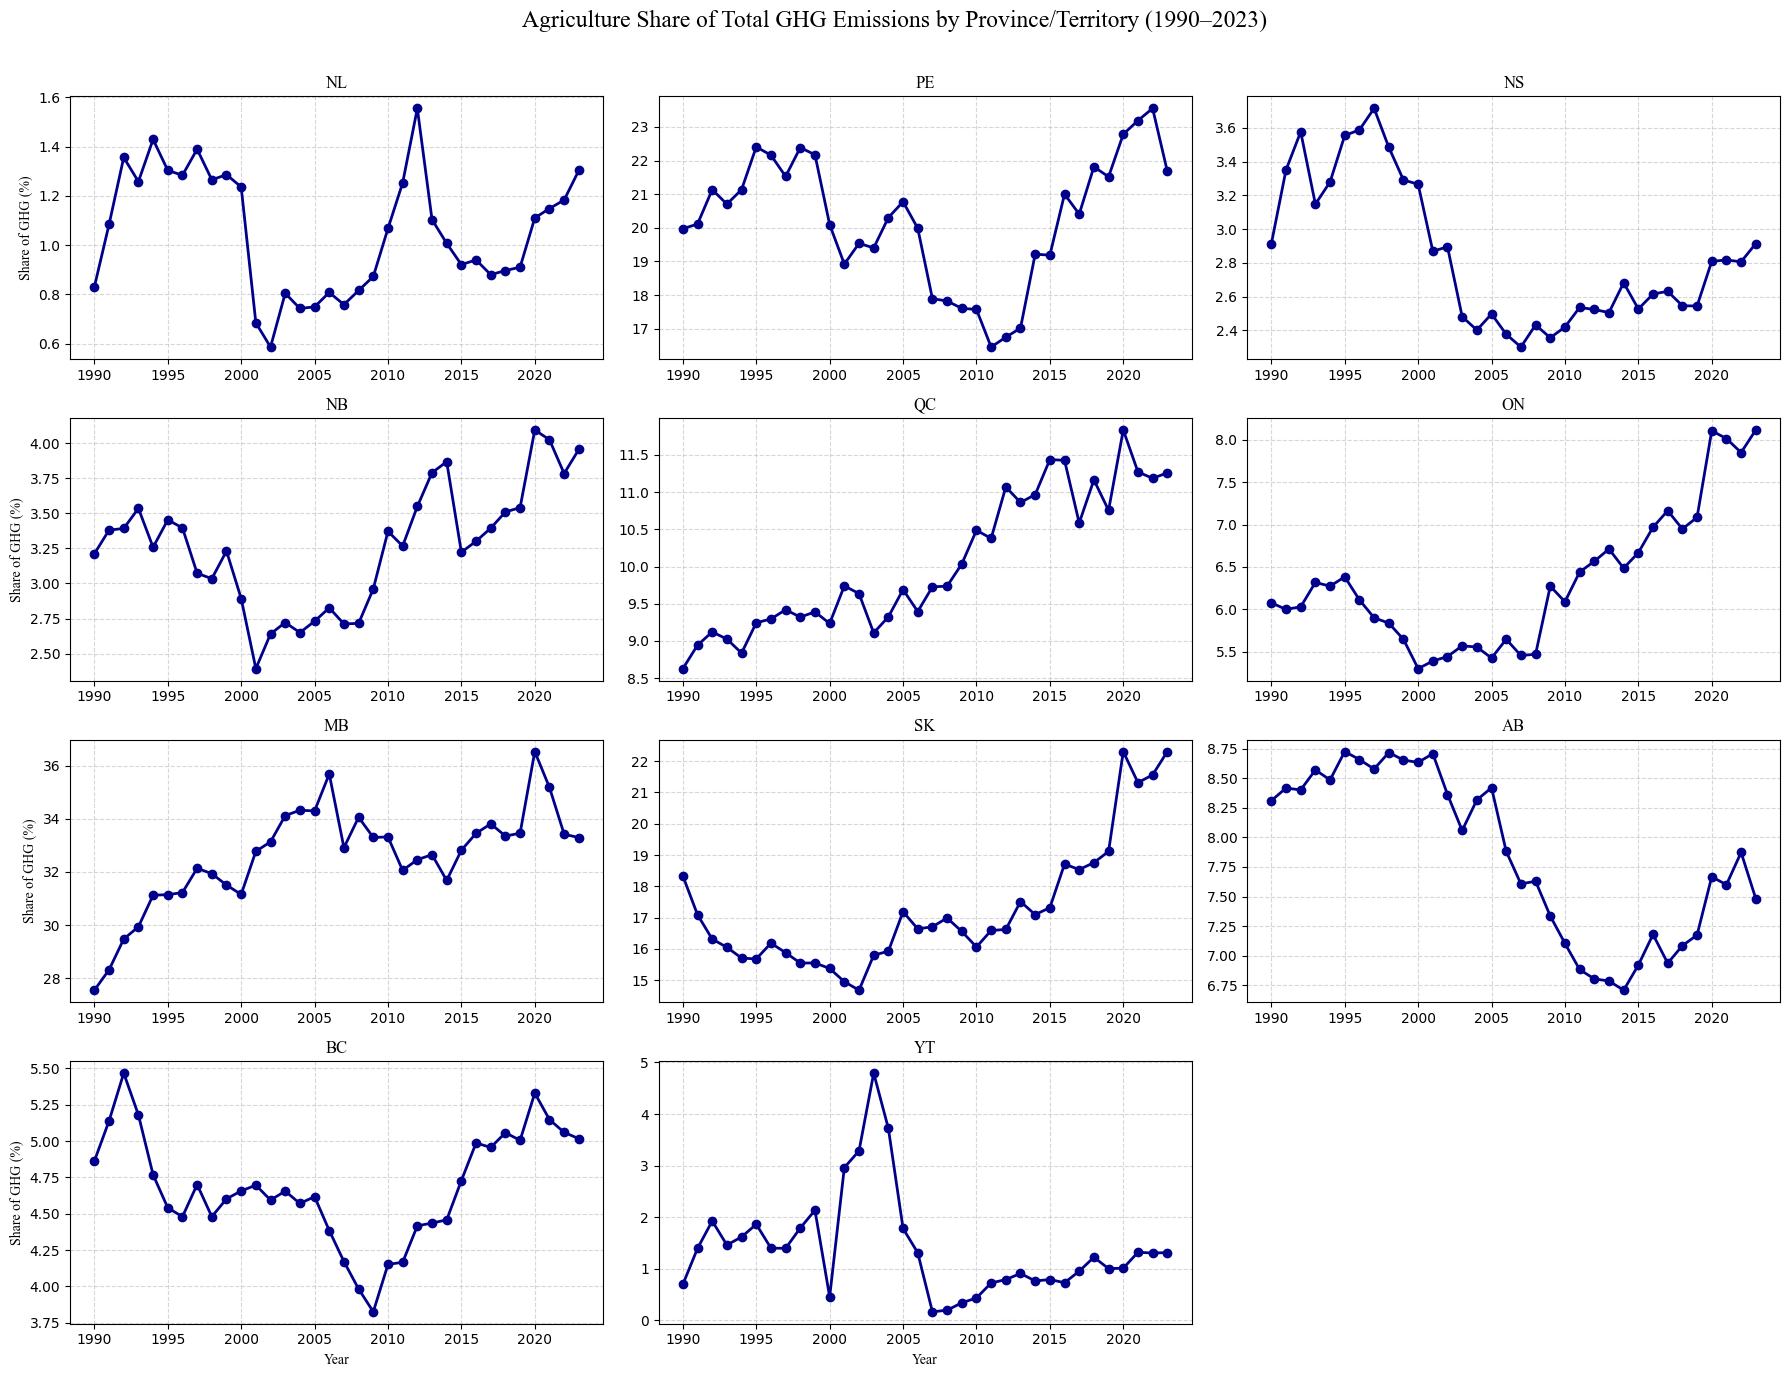

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file = "EN_Annex12_GHG_Econ_Prov_Terr.xlsx"

# Get all sheet names and keep only provinces
xls = pd.ExcelFile(file)
sheets = xls.sheet_names[4:-3]   # same slice you used: ['NL','PE','NS',...]

results = {}

# 1) Loop over all province sheets and compute shares
for sh in sheets:
    df = pd.read_excel(file, sheet_name=sh, header=0)

    # Years row (row index 1, from 2nd column onward)
    years = df.iloc[1, 1:].astype(int).tolist()

    # Data block starting from row 3 (0-based index), first col = Sector
    data = df.iloc[3:, :].copy()
    data.columns = ["Sector"] + years
    data = data.dropna(subset=["Sector"])

    # Pick agriculture + subsectors + total
    agriculture = data[data["Sector"] == "Agriculture"]
    farm        = data[data["Sector"] == "On Farm Fuel Use"]
    crop        = data[data["Sector"] == "Crop Production"]
    animal      = data[data["Sector"] == "Animal Production"]
    total       = data[data["Sector"] == "GHG TOTAL"]

    # Share of agriculture in total GHG (%)
    share_ag_total = (
        agriculture.set_index("Sector").iloc[:, :] /
        total.set_index("Sector").iloc[:, :].values * 100
    )

    # Shares of farm / crop / animal within agriculture (%)
    sub_ag = pd.concat([farm, crop, animal])
    share_within_ag = (
        sub_ag.set_index("Sector").iloc[:, :] /
        agriculture.set_index("Sector").iloc[:, :].values * 100
    )

    # Store in dictionary
    results[sh] = {
        "share_ag_total":   share_ag_total,
        "share_within_ag":  share_within_ag
    }

# 2) Panel plot: agriculture share of total GHG for all provinces
share_dict = {sh: results[sh]["share_ag_total"].T.squeeze() for sh in sheets}

fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, sh in enumerate(sheets):
    share_dict[sh].plot(ax=axes[i], lw=2, marker='o', c='darkblue')
    axes[i].set_title(sh, fontsize=12, fontname='Times New Roman')
    axes[i].grid(True, ls='--', alpha=0.5)

    if i % 3 == 0:
        axes[i].set_ylabel("Share of GHG (%)", fontsize=10, fontname='Times New Roman')
    if i >= 9:
        axes[i].set_xlabel("Year", fontsize=10, fontname='Times New Roman')

# Hide any unused subplot if fewer than 12 sheets
for j in range(len(sheets), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Agriculture Share of Total GHG Emissions by Province/Territory (1990–2023)",
             fontsize=17, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


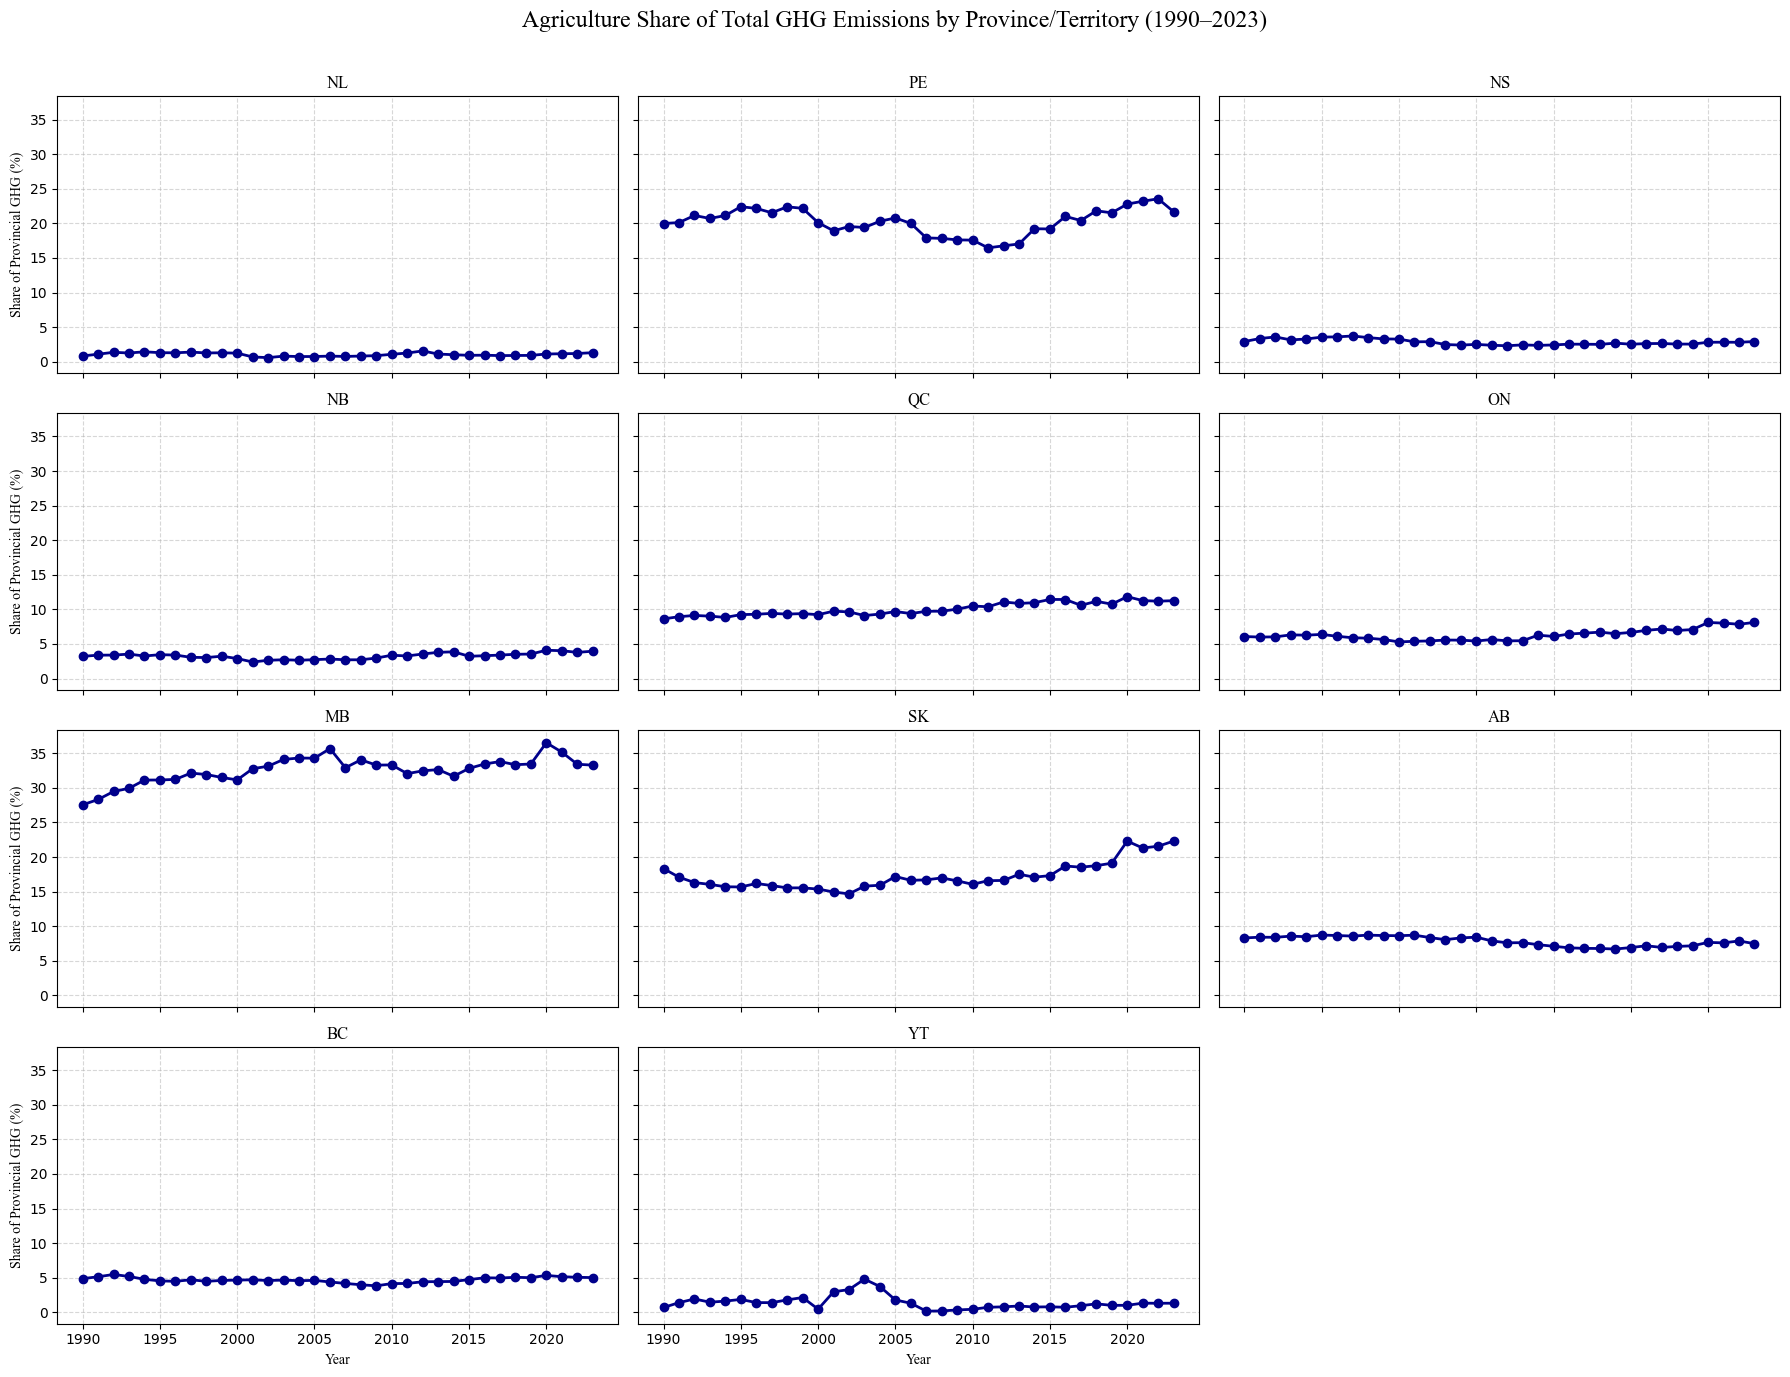

In [202]:
import matplotlib.pyplot as plt

# Collect all provinces’ agriculture share of total
share_dict = {sh: results[sh]["share_ag_total"].T.squeeze() for sh in sheets}

# Create subplots: 4 rows x 3 cols (12 slots)
fig, axes = plt.subplots(4, 3, figsize=(18, 14), sharex=True, sharey=True)

axes = axes.flatten()

for i, sh in enumerate(sheets):
    share_dict[sh].plot(ax=axes[i], lw=2, marker='o', c='darkblue')
    axes[i].set_title(sh, fontsize=12, fontname='Times New Roman')
    axes[i].grid(True, ls='--', alpha=0.5)

    if i % 3 == 0:
        axes[i].set_ylabel("Share of Provincial GHG (%)", fontsize=10, fontname='Times New Roman')
    if i >= 9:
        axes[i].set_xlabel("Year", fontsize=10, fontname='Times New Roman')

# Hide any unused subplot (if < 12 provinces)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Agriculture Share of Total GHG Emissions by Province/Territory (1990–2023)", 
             fontsize=17, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig('Agri_share_total_1990_by_provinces_same_scale.png', dpi=500, bbox_inches='tight')
plt.show()

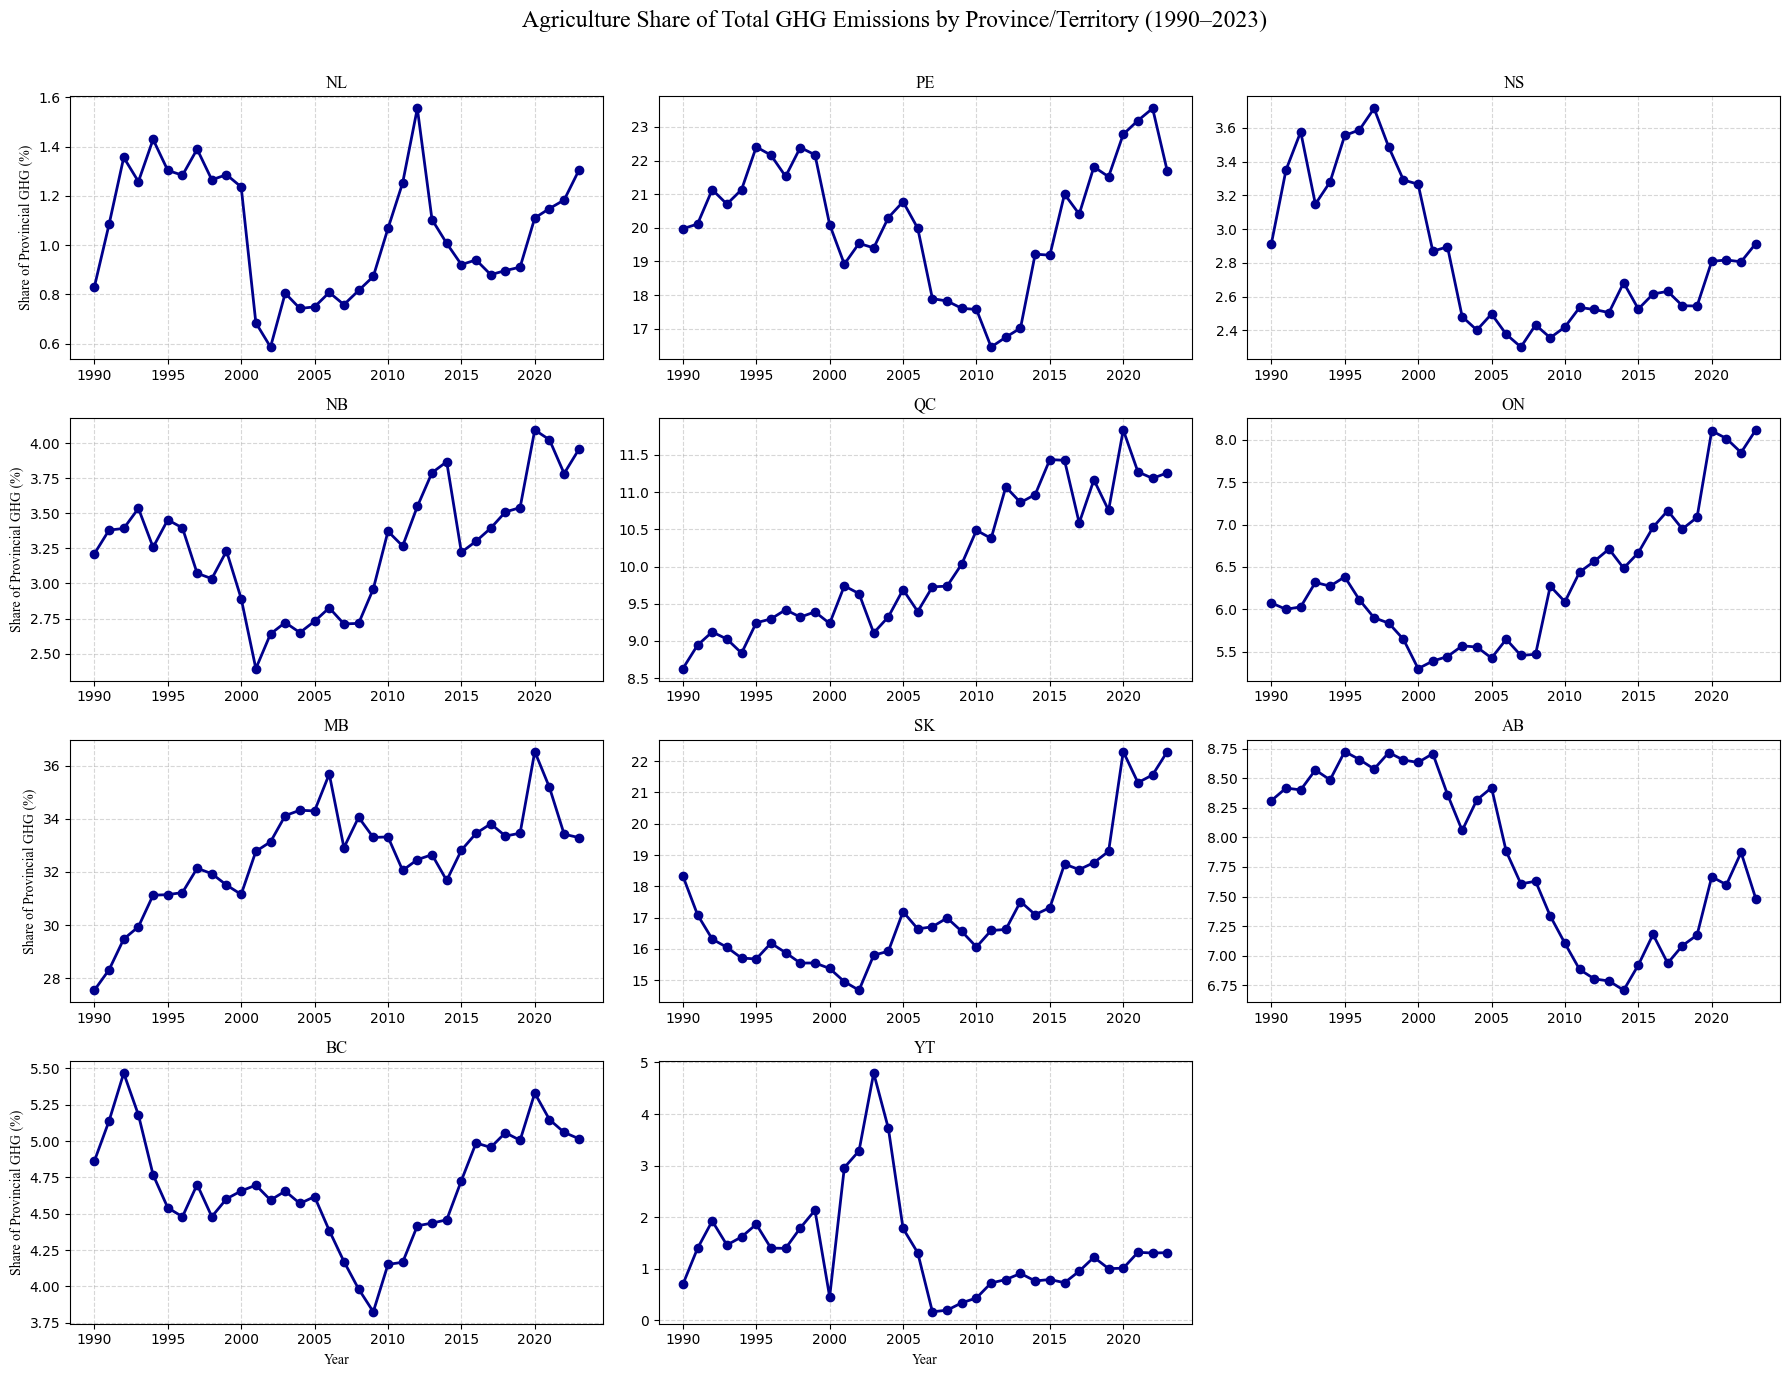

In [203]:
import matplotlib.pyplot as plt

# Collect all provinces’ agriculture share of total
share_dict = {sh: results[sh]["share_ag_total"].T.squeeze() for sh in sheets}

# Create subplots: 4 rows x 3 cols (12 slots)
fig, axes = plt.subplots(4, 3, figsize=(18, 14))

axes = axes.flatten()

for i, sh in enumerate(sheets):
    share_dict[sh].plot(ax=axes[i], lw=2, marker='o', c='darkblue')
    axes[i].set_title(sh, fontsize=12, fontname='Times New Roman')
    axes[i].grid(True, ls='--', alpha=0.5)

    if i % 3 == 0:
        axes[i].set_ylabel("Share of Provincial GHG (%)", fontsize=10, fontname='Times New Roman')
    if i >= 9:
        axes[i].set_xlabel("Year", fontsize=10, fontname='Times New Roman')

# Hide any unused subplot (if < 12 provinces)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Agriculture Share of Total GHG Emissions by Province/Territory (1990–2023)", 
             fontsize=17, fontname='Times New Roman')
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig('Agri_share_total_1990_by_provinces_diff_scale.png', dpi=500, bbox_inches='tight')
plt.show()

In [23]:
import pandas as pd

# A) Agriculture share of total GHG for all provinces
df_share_ag_total = pd.DataFrame()

for sh in results:
    share = results[sh]["share_ag_total"]
    # convert 1-row dataframe into long format
    tmp = share.T.reset_index()
    tmp.columns = ["Year", "Share_Ag_in_Total_GHG"]
    tmp["Province"] = sh
    df_share_ag_total = pd.concat([df_share_ag_total, tmp], ignore_index=True)

# Save to CSV
df_share_ag_total.to_csv("Agri_Share_Total_GHG_by_Province.csv", index=False)
print("Saved: Agri_Share_Total_GHG_by_Province.csv")


# B) Subsector shares within agriculture (%)
df_share_within_ag = pd.DataFrame()

for sh in results:
    share = results[sh]["share_within_ag"]
    tmp = share.copy()
    tmp["Sector"] = tmp.index
    tmp = tmp.reset_index(drop=True)
    tmp = tmp.melt(id_vars="Sector", var_name="Year", value_name="Share_within_Ag")
    tmp["Province"] = sh
    df_share_within_ag = pd.concat([df_share_within_ag, tmp], ignore_index=True)

df_share_within_ag.to_csv("Agri_Subsector_Shares_by_Province.csv", index=False)
print("Saved: Agri_Subsector_Shares_by_Province.csv")


Saved: Agri_Share_Total_GHG_by_Province.csv
Saved: Agri_Subsector_Shares_by_Province.csv


# total farm area distribution

In [206]:
df = pd.read_csv("3210015601_databaseLoadingData.csv")


In [210]:
# Example: Canada only, exclude "Total number of farms" row
canada = df[(df["GEO"] == "Canada") & 
            (df["Total farm area distribution"] != "Total number of farms")]

# Pivot so farm size categories become columns
canada_pivot = canada.pivot(index="REF_DATE", 
                            columns="Total farm area distribution", 
                            values="VALUE")

# Normalize to shares of total farms
canada_share = canada_pivot.div(canada_pivot.sum(axis=1), axis=0) * 100


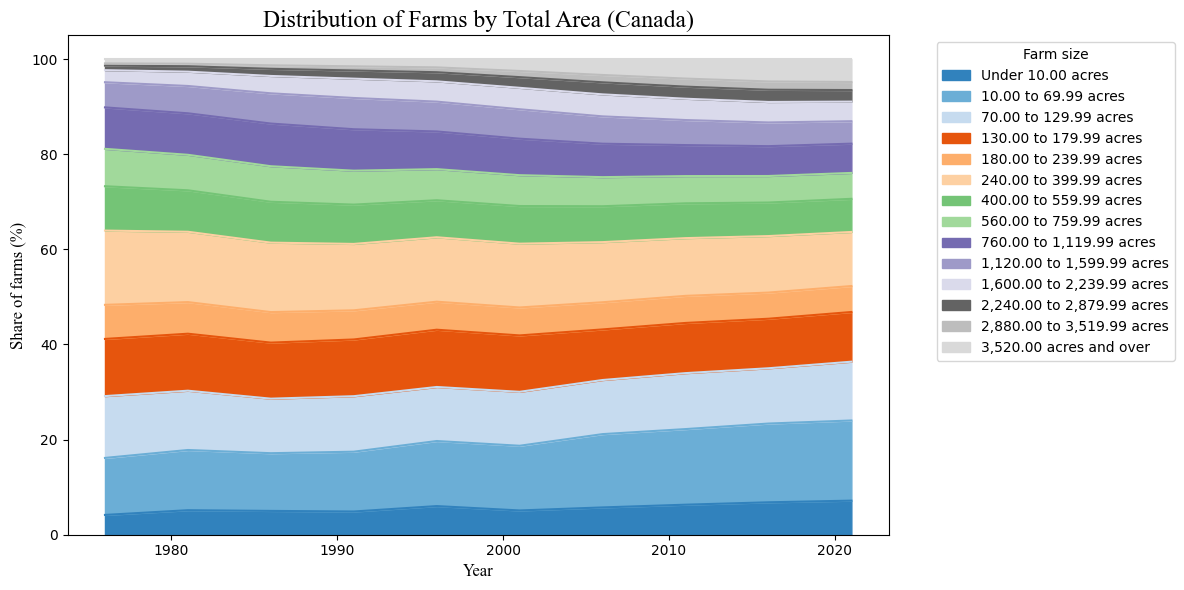

In [222]:
order = [
    'Under 10.00 acres',
    '10.00 to 69.99 acres',
    '70.00 to 129.99 acres',
    '130.00 to 179.99 acres',
    '180.00 to 239.99 acres',
    '240.00 to 399.99 acres',
    '400.00 to 559.99 acres',
    '560.00 to 759.99 acres',
    '760.00 to 1,119.99 acres',
    '1,120.00 to 1,599.99 acres',
    '1,600.00 to 2,239.99 acres',
    '2,240.00 to 2,879.99 acres',
    '2,880.00 to 3,519.99 acres',
    '3,520.00 acres and over'
]

canada_pivot = canada.pivot(index="REF_DATE", 
                            columns="Total farm area distribution", 
                            values="VALUE")[order]

canada_share = canada_pivot.div(canada_pivot.sum(axis=1), axis=0) * 100

canada_share.plot.area(figsize=(12,6), cmap="tab20c")
plt.title("Distribution of Farms by Total Area (Canada)", fontsize=17, fontname="Times New Roman")
plt.ylabel("Share of farms (%)", fontsize=12, fontname='Times New Roman')
plt.xlabel("Year", fontsize=12, fontname='Times New Roman')
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Farm size")
plt.tight_layout()
#plt.savefig('Distribution_farms_area_total_canada.png', dpi=500, bbox_inches='tight')
plt.show()

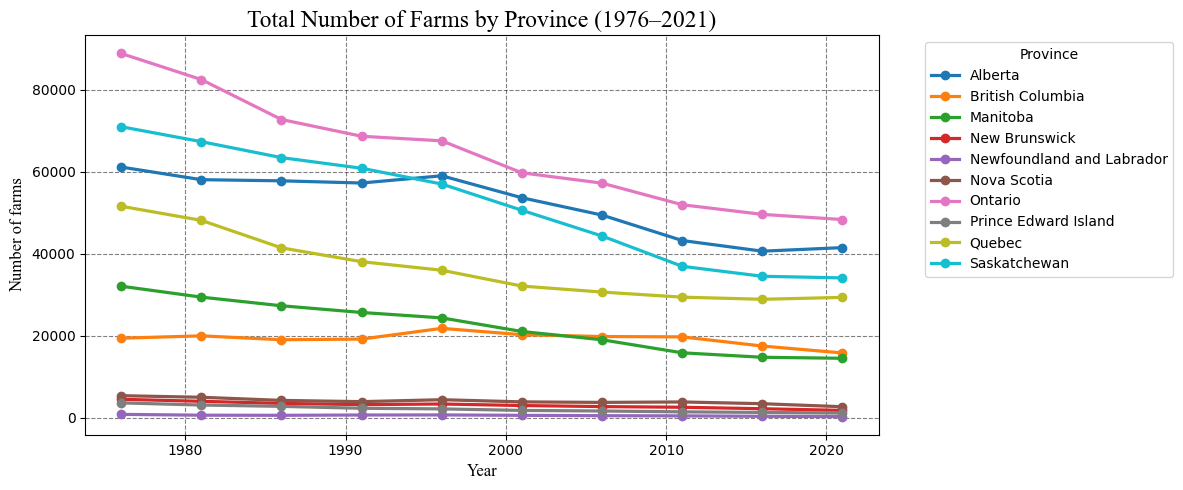

In [240]:
# Filter only "Total number of farms"
totals = df[df["Total farm area distribution"] == "Total number of farms"]

# Pivot: years as index, provinces as columns
prov_totals = totals.pivot(index="REF_DATE", columns="GEO", values="VALUE")

# Drop the Canada column
prov_totals = prov_totals.drop(columns="Canada")

# Line plot
prov_totals.plot(lw=2.3, marker="o", figsize=(12,5))
plt.title("Total Number of Farms by Province (1976–2021)", fontsize=17, fontname="Times New Roman")
plt.ylabel("Number of farms", fontsize=12, fontname="Times New Roman")
plt.xlabel("Year", fontsize=12, fontname="Times New Roman")
plt.grid(ls="--", alpha=0.5, c='k')
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Province")
plt.tight_layout()
#plt.savefig('total_farm_number_by_provinces.png', dpi=500, bbox_inches='tight')
plt.show()

# land use

In [2]:
df = pd.read_csv("3210015301_databaseLoadingData.csv")


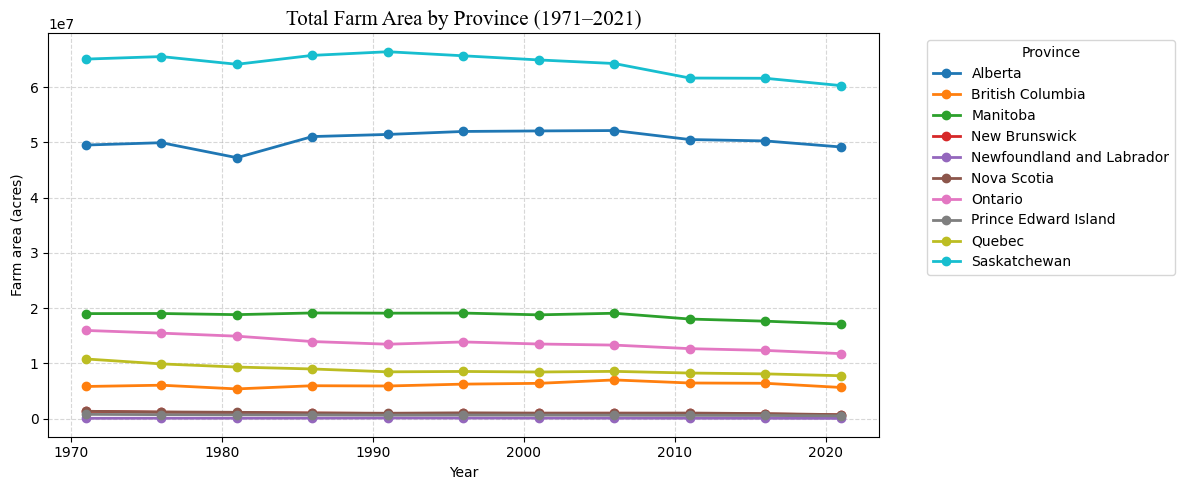

In [3]:
# Filter to "Total area of farms" in acres
area = df[(df["Land use"] == "Total area of farms") & 
          (df["Unit of measure"] == "Acres") 
         & (df['REF_DATE']>=1971)
         ]

prov_area = area.pivot(index="REF_DATE", columns="GEO", values="VALUE")

# Drop Canada if you want provinces only
prov_area = prov_area.drop(columns="Canada")

prov_area.plot(figsize=(12,5), lw=2, marker="o")
plt.title("Total Farm Area by Province (1971–2021)", fontsize=15, fontname="Times New Roman")
plt.ylabel("Farm area (acres)")
plt.xlabel("Year")
plt.grid(ls="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Province")
plt.tight_layout()
#plt.savefig('farm_area_by_province.png', dpi=500, bbox_inches='tight')

plt.show()


In [5]:
land_share

Land use,All other land,Land in crops,Summerfallow land,Tame or seeded pasture
REF_DATE,,,,
1971,NaN,100.000000,NaN,NaN
1976,36.679996,41.422581,15.958872,5.938551
1981,31.593688,46.996719,14.724553,6.685040
1986,33.300464,48.921289,12.530661,5.247586
1991,32.741757,49.455276,11.690798,6.112169
1996,33.100252,51.309611,9.199514,6.390623
2001,32.032025,53.916788,6.933672,7.117514
2006,33.252873,53.135049,5.186777,8.425302
2011,33.704193,54.542177,3.217263,8.536367


In [6]:
land_pivot

Land use,All other land,Land in crops,Summerfallow land,Tame or seeded pasture
REF_DATE,,,,
1971,NaN,68765273.0,NaN,NaN
1976,62019338.0,70038204.0,26983608.0,10041031.0
1981,51439593.0,76518197.0,23973934.0,10884318.0
1986,55811948.0,81992625.0,21001527.0,8795013.0
1991,54817250.0,82799535.0,19573092.0,10233180.0
1996,55663858.0,86286078.0,15470590.0,10746949.0
2001,53430122.0,89934387.0,11565518.0,11872170.0
2006,55535786.0,88741106.0,8662461.0,14071138.0
2011,53979202.0,87352431.0,5152632.0,13671483.0


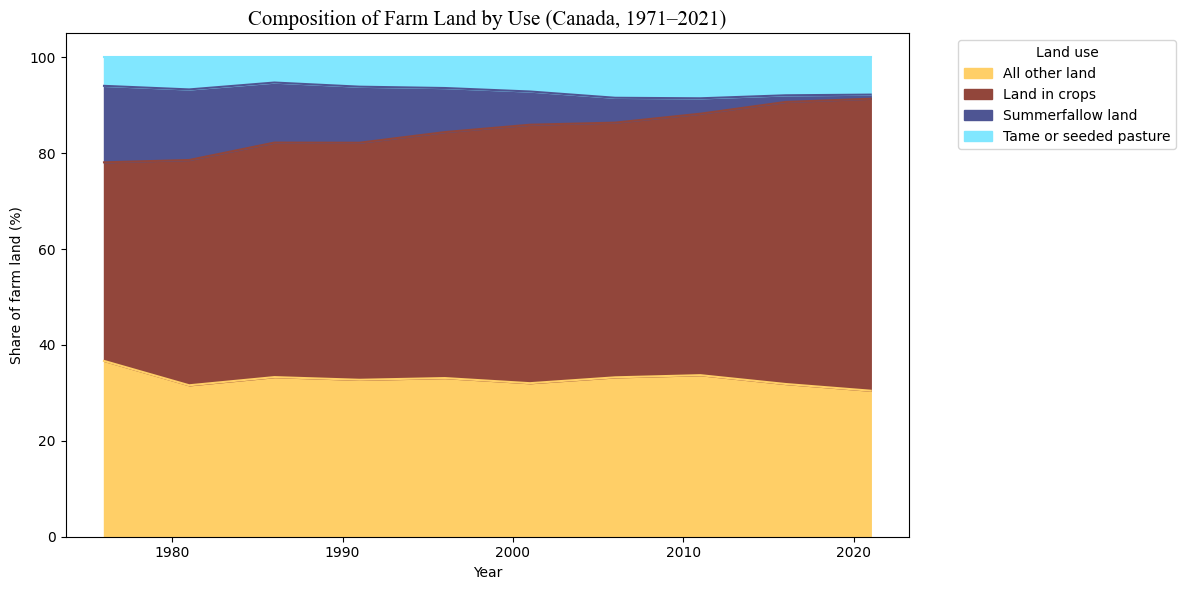

In [7]:
# Canada only
canada_land = df[(df["GEO"] == "Canada") & 
                 (df['REF_DATE']>=1971) &
                 (df["Unit of measure"] == "Acres") &
                 (df["Land use"].isin(["Land in crops", 
                                       "Summerfallow land", 
                                       "Tame or seeded pasture", 
                                       "All other land"]))]

land_pivot = canada_land.pivot(index="REF_DATE", 
                               columns="Land use", 
                               values="VALUE")

land_share = land_pivot.div(land_pivot.sum(axis=1), axis=0) * 100

land_share.iloc[1:].plot.area(figsize=(12,6), cmap="managua")
plt.title("Composition of Farm Land by Use (Canada, 1971–2021)", fontsize=15, fontname="Times New Roman")
plt.ylabel("Share of farm land (%)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Land use")
plt.tight_layout()
#plt.savefig('farm_land_use_canada.png', dpi=500, bbox_inches='tight')

plt.show()


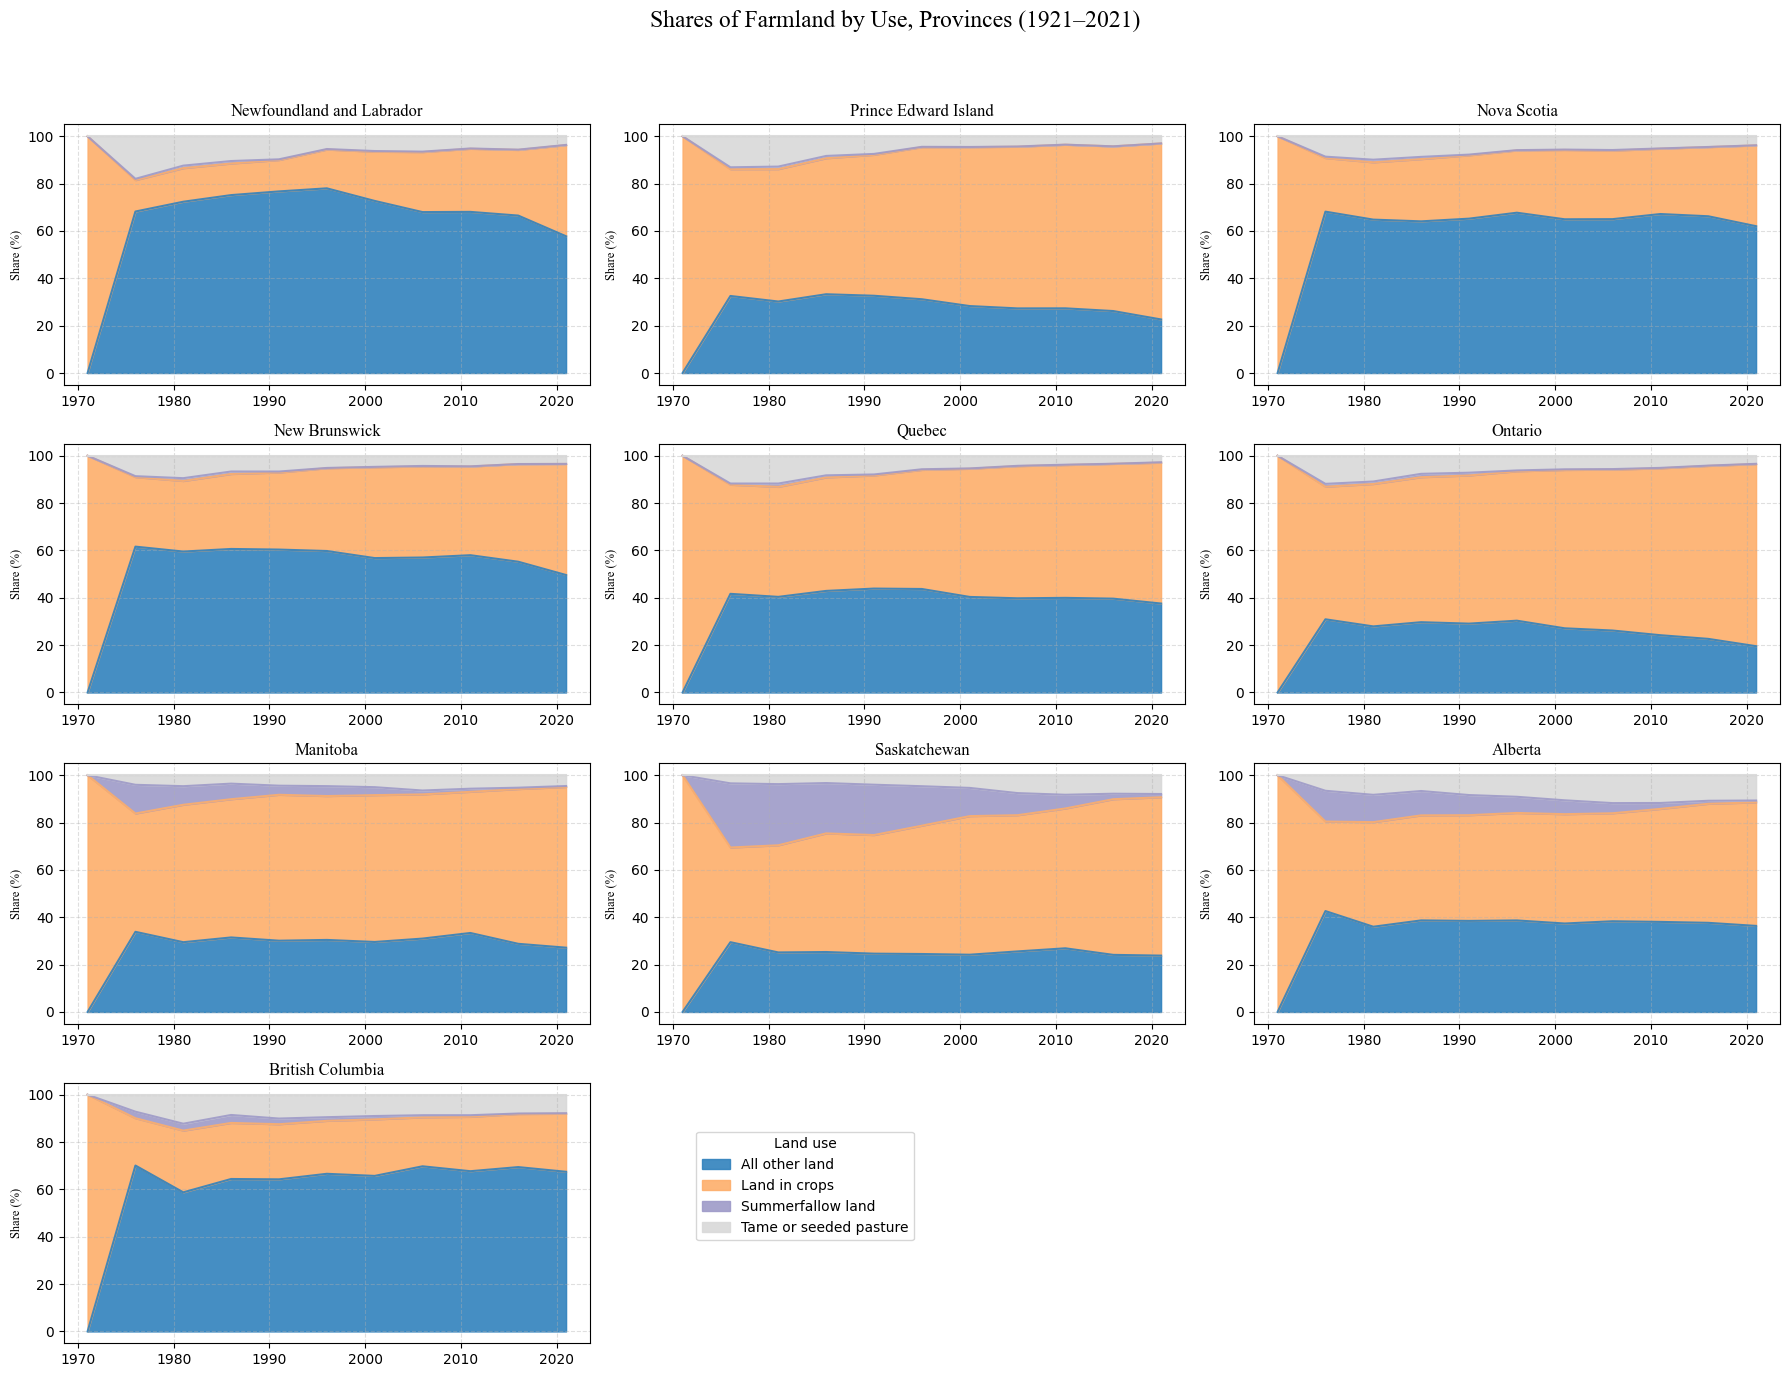

In [277]:
import matplotlib.pyplot as plt

# Filter to the four categories, in acres
land_use = df[(df["Unit of measure"] == "Acres") &
              (df['REF_DATE']>=1971) &
              (df["Land use"].isin([
                  "Land in crops",
                  "Summerfallow land",
                  "Tame or seeded pasture",
                  "All other land"
              ]))]

# Provinces only (10)
provinces = [p for p in land_use["GEO"].unique() if p not in ["Canada"]]

# Subplot grid: 4x3 (12 slots → 10 provinces + 2 empty for legend)
fig, axes = plt.subplots(4, 3, figsize=(18, 14), sharex=False, sharey=False)
axes = axes.flatten()

# Save handles for legend
legend_handles, legend_labels = None, None

for i, prov in enumerate(provinces):
    prov_df = land_use[land_use["GEO"] == prov]
    pivot = prov_df.pivot(index="REF_DATE", columns="Land use", values="VALUE")
    share = pivot.div(pivot.sum(axis=1), axis=0) * 100
    
    ax = axes[i]
    lines = share.plot.area(ax=ax, cmap="tab20c", alpha=0.9, legend=False)
    ax.set_title(prov, fontsize=12, fontname="Times New Roman")
    ax.grid(ls="--", alpha=0.4)
    ax.set_ylabel("Share (%)", fontsize=9, fontname="Times New Roman")
    ax.set_xlabel("")
    
    # Capture legend handles once
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Remove last two axes (positions 10 and 11 → 0-based index 10,11)
for j in range(len(provinces), len(axes)):
    axes[j].axis("off")

# Add shared legend in bottom-right (axes[10] and axes[11] removed, so use one of them)
fig.legend(legend_handles, legend_labels, loc="center", 
           bbox_to_anchor=(0.45, 0.14), title="Land use", ncol=1)

plt.suptitle("Shares of Farmland by Use, Provinces (1921–2021)", 
             fontsize=17, fontname="Times New Roman")
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig('farm_land_use_by_provinces.png', dpi=500, bbox_inches='tight')

plt.show()


# esport farms

In [291]:
df = pd.read_csv("1210017201_databaseLoadingData.csv")
#df.head()

In [293]:
df = pd.read_csv("1210017201_databaseLoadingData.csv")
#df.head()

# Keep only exports (you could also compare with imports if needed)
trade = df[(df["Trade"] == "Export")]

# --- Define relevant categories ---
ag_root = "Farm, fishing and intermediate food products [C11]"
ag_sub = [
    "Live animals [111]",
    "Wheat [112]",
    "Canola (including rapeseed) [113]",
    "Fresh fruit, nuts and vegetables, and pulse crops [114]",
    "Other crop products [115]",
    "Other animal products [116]",
    "Fish, crustaceans, shellfish and other fishery products [121]",
    "Animal feed [181]",
    "Intermediate food products [182]"
]

# Filter only agriculture root + subs
agri = trade[trade["North American Product Classification System (NAPCS)"].isin([ag_root] + ag_sub)]

# Pivot for plotting (years x products)
pivot = agri.pivot(index="REF_DATE", 
                   columns="North American Product Classification System (NAPCS)", 
                   values="VALUE")

# Convert from thousands to billions
pivot = pivot / 1e6  # thousand dollars → billion dollars

In [294]:
pivot

North American Product Classification System (NAPCS),Animal feed [181],Canola (including rapeseed) [113],"Farm, fishing and intermediate food products [C11]","Fish, crustaceans, shellfish and other fishery products [121]","Fresh fruit, nuts and vegetables, and pulse crops [114]",Intermediate food products [182],Live animals [111],Other animal products [116],Other crop products [115],Wheat [112]
REF_DATE,,,,,,,,,,
2020,0.646326,0.267343,17.981209,3.098723,3.277322,5.484971,1.788975,0.103427,2.734376,0.579746
2021,0.671677,0.258613,22.363176,4.720727,3.358942,7.543149,2.084678,0.094712,3.128086,0.502593
2022,0.787619,0.323996,26.982017,4.082498,4.019180,10.259756,2.534616,0.125813,3.916301,0.932238
2023,0.899559,0.248478,29.106021,3.542276,4.369711,11.993766,2.748081,0.107551,4.174815,1.021785
2024,1.004132,0.209307,28.993445,3.997418,4.724000,10.629366,3.422013,0.122268,3.930845,0.954096


In [298]:
farm_pivot

Trade,Export
REF_DATE,
2020,17.981209
2021,22.363176
2022,26.982017
2023,29.106021
2024,28.993445


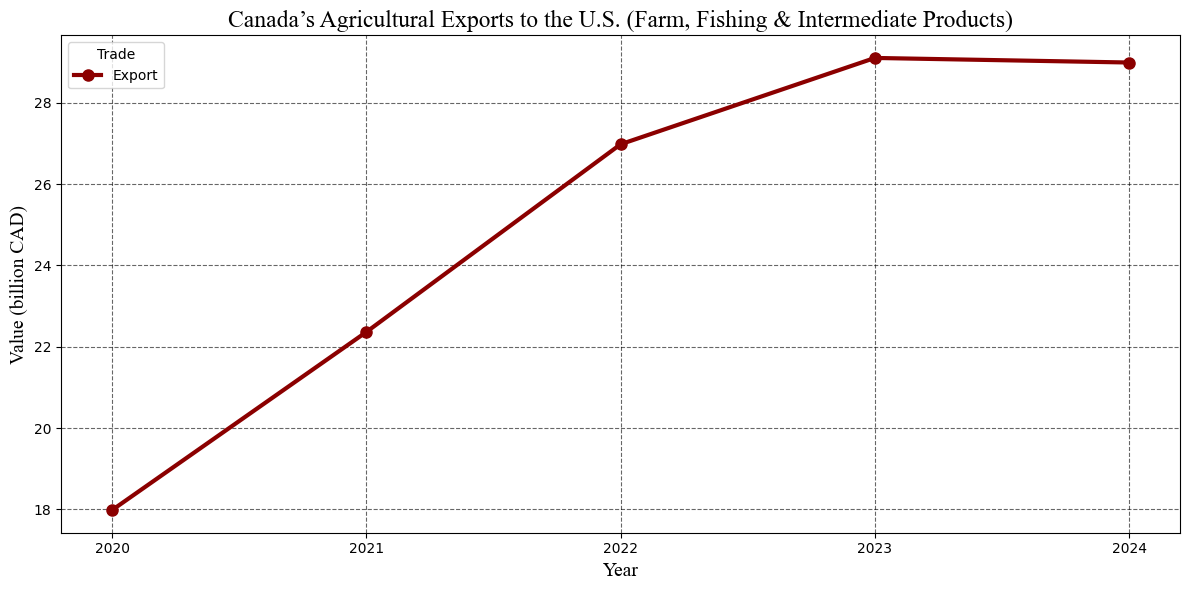

In [347]:
farm = trade[trade["North American Product Classification System (NAPCS)"] == ag_root]

farm_pivot = farm.pivot(index="REF_DATE", columns="Trade", values="VALUE") / 1e6

farm_pivot.plot(marker="o", figsize=(12,6), lw=3, c="darkred", markersize=8)
plt.title("Canada’s Agricultural Exports to the U.S. (Farm, Fishing & Intermediate Products)", 
          fontsize=17, fontname="Times New Roman")
plt.ylabel("Value (billion CAD)", fontsize=14, fontname="Times New Roman")
plt.xlabel("Year", fontsize=14, fontname="Times New Roman")
plt.grid(ls="--", alpha=0.6, c='k')
plt.tight_layout()
plt.xticks(np.arange(2020, 2025), np.arange(2020, 2025))
#plt.savefig('farm_export_us_2020_2024.png', dpi=500, bbox_inches='tight')
plt.show()


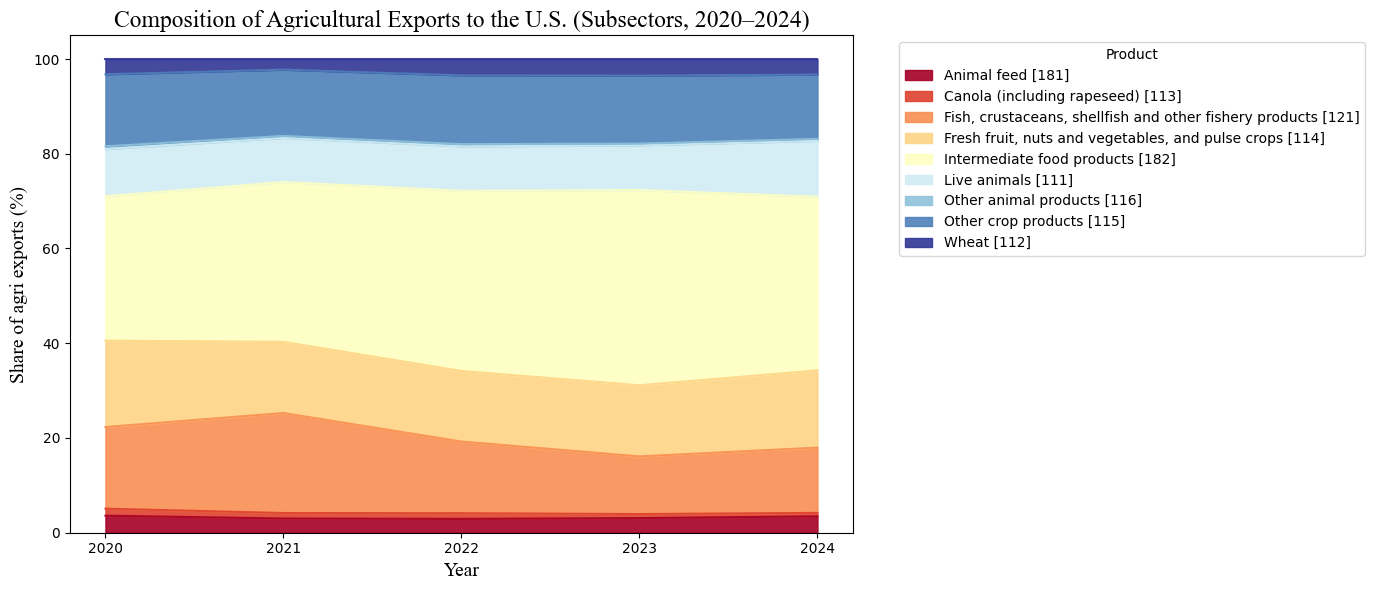

In [348]:
subs = trade[trade["North American Product Classification System (NAPCS)"].isin(ag_sub)]
pivot_subs = subs.pivot(index="REF_DATE", 
                        columns="North American Product Classification System (NAPCS)", 
                        values="VALUE") / 1e6

shares = pivot_subs.div(pivot_subs.sum(axis=1), axis=0) * 100
shares.plot.area(figsize=(14,6), cmap="RdYlBu", alpha=0.9)
plt.title("Composition of Agricultural Exports to the U.S. (Subsectors, 2020–2024)", 
          fontsize=17, fontname="Times New Roman")
plt.ylabel("Share of agri exports (%)", fontsize=14, fontname="Times New Roman")
plt.xlabel("Year", fontsize=14, fontname="Times New Roman")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Product")
plt.tight_layout()
plt.xticks(np.arange(2020, 2025), np.arange(2020, 2025))
#plt.savefig('farm_subsectors_export_us_2020_2024.png', dpi=500, bbox_inches='tight')

plt.show()

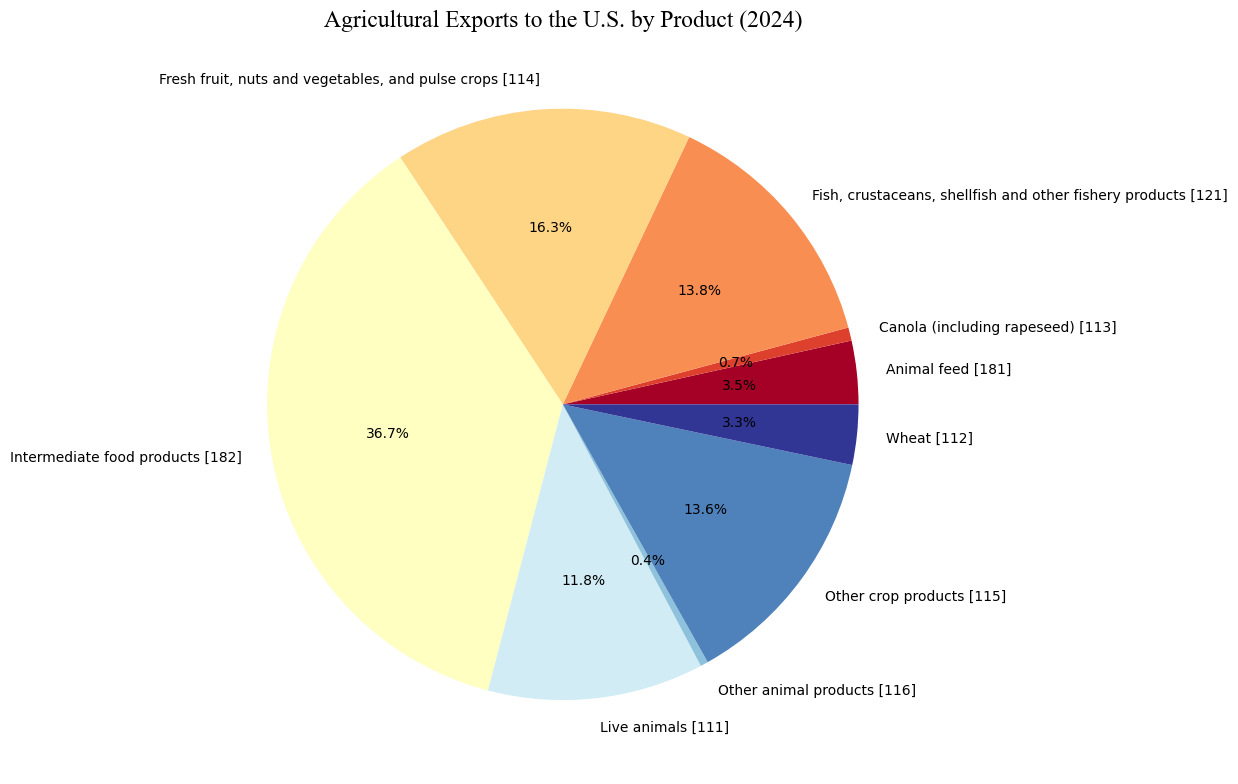

In [349]:
last_year = pivot_subs.loc[2024]

last_year.plot.pie(autopct="%1.1f%%", figsize=(12,12), cmap="RdYlBu")
plt.title("Agricultural Exports to the U.S. by Product (2024)", fontsize=17, fontname="Times New Roman")
plt.ylabel("")
plt.tight_layout()
#plt.savefig('farm_export_us_2024.png', dpi=500, bbox_inches='tight')
plt.show()

# Farm characteristics

In [350]:
df = pd.read_csv("3210038101_databaseLoadingData.csv")

In [397]:
df_age = df[(df["Farms according to the number of operators reported"]=="All farms") &
            (df["Characteristics"].isin(["Age - under 35 years","Age - 35 to 54 years","Age - 55 years and over"])) &
            (~df["GEO"].str.contains("Canada"))]


# Pivot to % share by province
age_pivot = df_age.pivot(index="GEO", columns="Characteristics", values="VALUE")
age_pivot = age_pivot.div(age_pivot.sum(axis=1), axis=0) * 100
age_pivot

order = ["Age - under 35 years", "Age - 35 to 54 years", "Age - 55 years and over"]
age_pivot = age_pivot[order]
age_pivot

Characteristics,Age - under 35 years,Age - 35 to 54 years,Age - 55 years and over
GEO,,,
Alberta [PR480000000],8.943089,28.962322,62.094589
British Columbia [PR590000000],5.108719,28.731265,66.160017
Manitoba [PR460000000],11.453518,32.742681,55.803801
New Brunswick [PR130000000],6.666667,30.505051,62.828283
Newfoundland and Labrador [PR100000000],3.409091,29.545455,67.045455
Nova Scotia [PR120000000],6.340819,26.023778,67.635403
Ontario [PR350000000],8.338279,29.347181,62.314540
Prince Edward Island [PR110000000],5.937500,33.437500,60.625000
Quebec [PR240000000],8.621097,37.949385,53.429518


In [394]:
len(list(age_pivot.index))

10

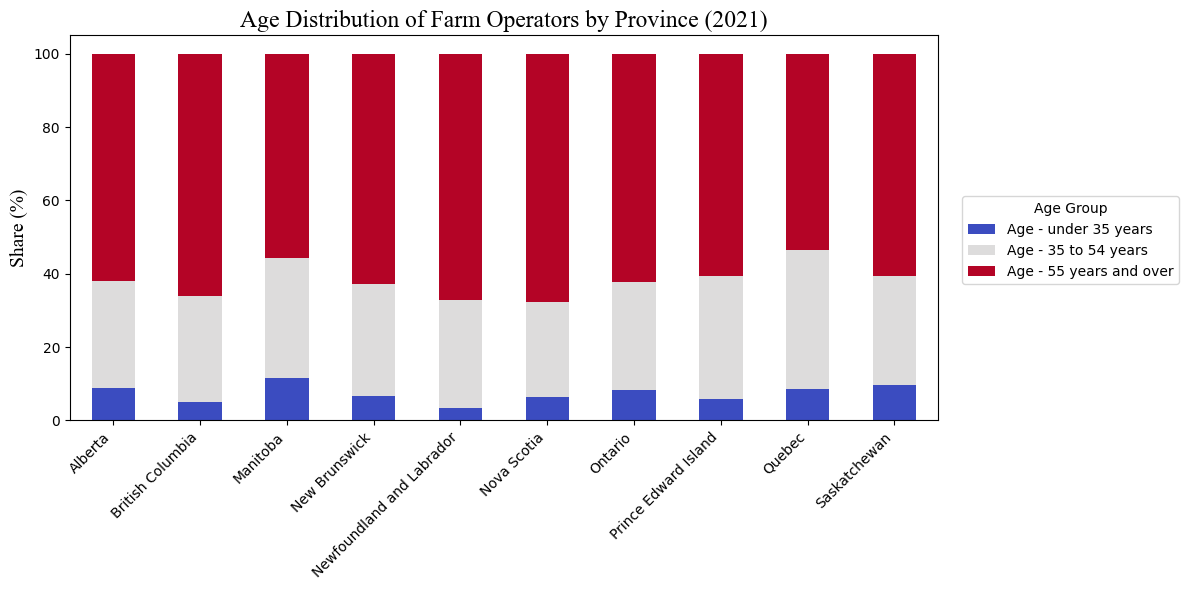

In [438]:
# Plot stacked bar
age_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.title("Age Distribution of Farm Operators by Province (2021)", fontsize=17, fontname="Times New Roman")
plt.ylabel("Share (%)", fontsize=14, fontname="Times New Roman")
plt.xlabel("", fontsize=14, fontname="Times New Roman")
plt.xticks(np.arange(0,10), ['Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan'])
plt.xticks(rotation=45, ha="right")

plt.legend(title="Age Group", bbox_to_anchor=(1.02, 0.6), loc="upper left")
plt.tight_layout()
#plt.savefig('age_dist_province_2021.png', dpi=500, bbox_inches='tight')
plt.show()

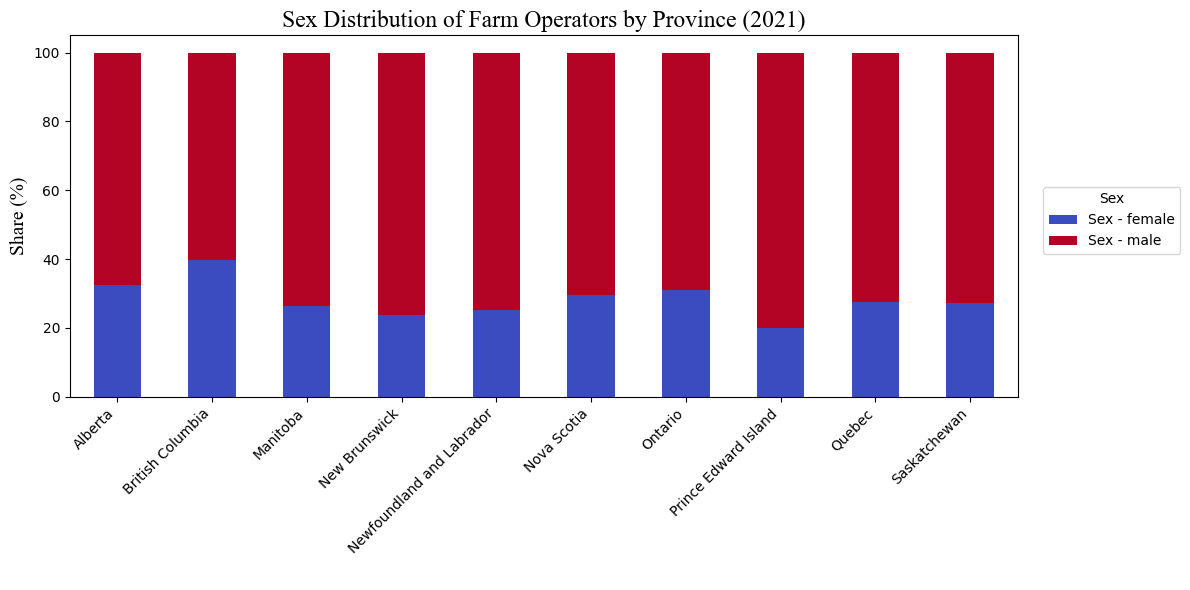

In [439]:
df_sex = df[(df["Farms according to the number of operators reported"]=="All farms") &
            (df["Characteristics"].isin(["Sex - male","Sex - female"])) &
            (~df["GEO"].str.contains("Canada"))]

sex_pivot = df_sex.pivot(index="GEO", columns="Characteristics", values="VALUE")
sex_pivot = sex_pivot.div(sex_pivot.sum(axis=1), axis=0) * 100

sex_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.title("Sex Distribution of Farm Operators by Province (2021)", fontsize=17, fontname="Times New Roman")
plt.ylabel("Share (%)", fontsize=14, fontname="Times New Roman")
plt.xlabel(" ", fontsize=14, fontname="Times New Roman")


plt.xticks(np.arange(0,10), ['Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan'])
plt.xticks(rotation=45, ha="right")

plt.legend(title="Sex", bbox_to_anchor=(1.02, 0.6), loc="upper left")


plt.tight_layout()
#plt.savefig('sex_dist_province_2021.png', dpi=500, bbox_inches='tight')

plt.show()


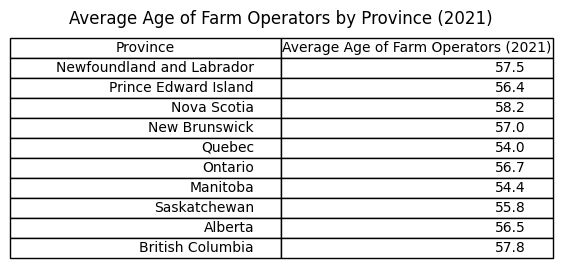

In [447]:
import pandas as pd

data = {
    "Province": [
        "Newfoundland and Labrador",
        "Prince Edward Island",
        "Nova Scotia",
        "New Brunswick",
        "Quebec",
        "Ontario",
        "Manitoba",
        "Saskatchewan",
        "Alberta",
        "British Columbia"
    ],
    "Average Age of Farm Operators (2021)": [
        57.5, 56.4, 58.2, 57.0, 54.0, 56.7, 54.4, 55.8, 56.5, 57.8
    ]
}

df_avg_age = pd.DataFrame(data)

# Display as nice table
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,3))
ax.axis("off")
table = ax.table(cellText=df_avg_age.values,
                 colLabels=df_avg_age.columns,
                 loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.title("Average Age of Farm Operators by Province (2021)")
plt.show()


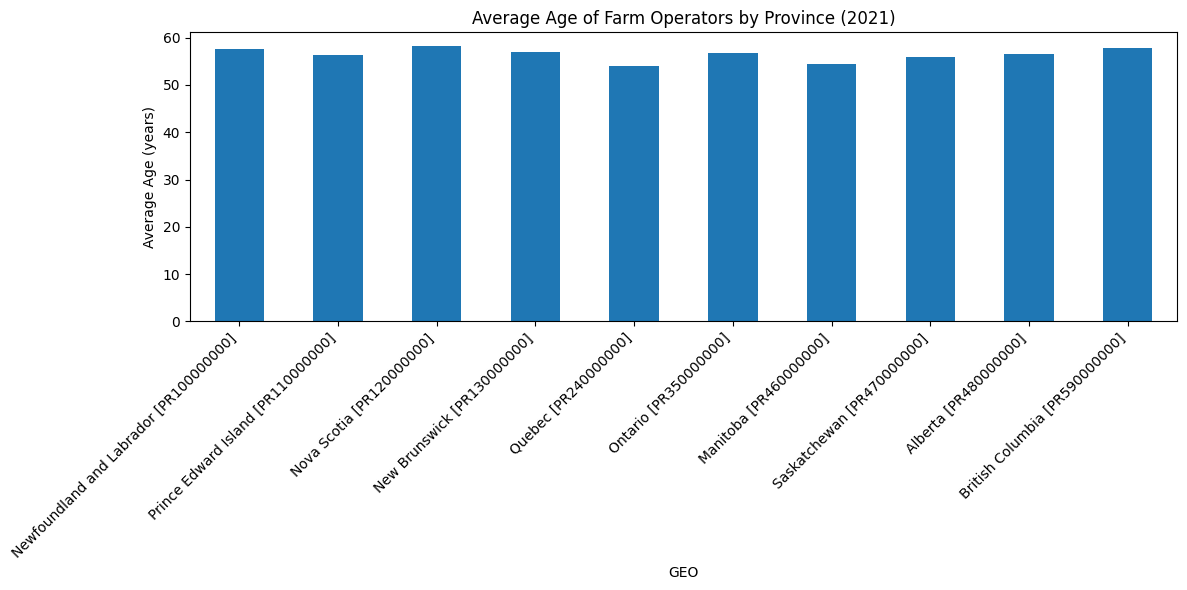

In [425]:
df_avg_age = df[(df["Farms according to the number of operators reported"]=="All farms") &
                (df["Characteristics"]=="Age - average") &
                (~df["GEO"].str.contains("Canada"))]

df_avg_age.plot(kind="bar", x="GEO", y="VALUE", legend=False, figsize=(12,6))
plt.title("Average Age of Farm Operators by Province (2021)")
plt.ylabel("Average Age (years)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


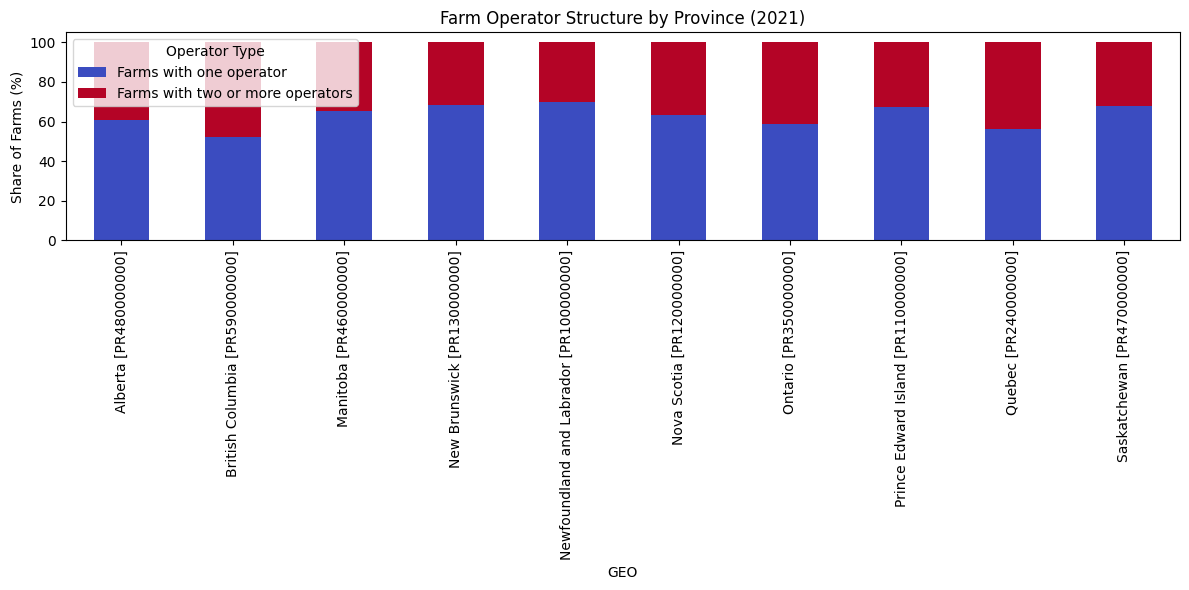

In [426]:
df_ops = df[(df["Characteristics"]=="Total number of farms") &
            (df["Farms according to the number of operators reported"].isin(["Farms with one operator","Farms with two or more operators"])) &
            (~df["GEO"].str.contains("Canada"))]

ops_pivot = df_ops.pivot(index="GEO", columns="Farms according to the number of operators reported", values="VALUE")
ops_pivot = ops_pivot.div(ops_pivot.sum(axis=1), axis=0) * 100

ops_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.title("Farm Operator Structure by Province (2021)")
plt.ylabel("Share of Farms (%)")
plt.legend(title="Operator Type")
plt.tight_layout()
plt.show()


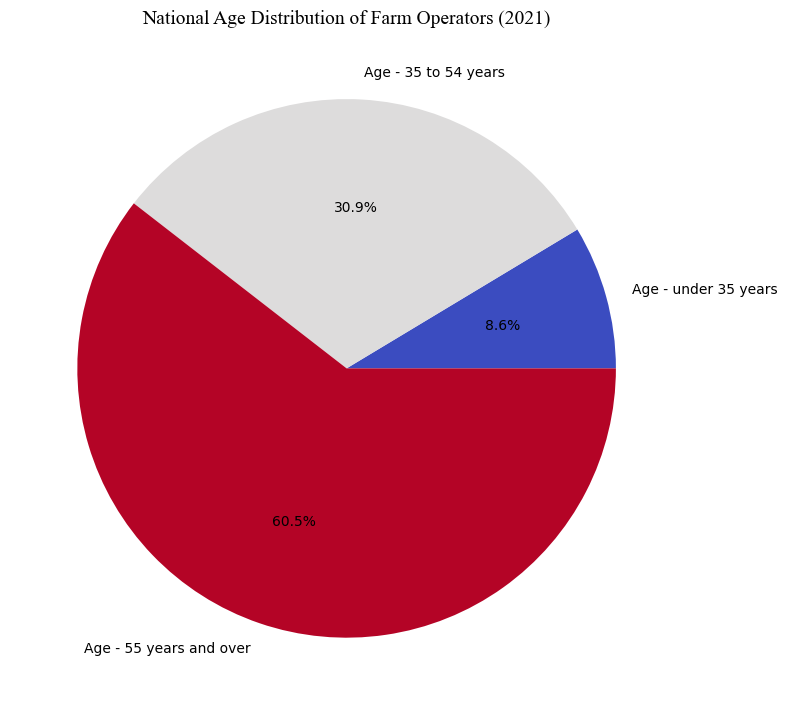

In [448]:
df_nat_age = df[(df["GEO"]=="Canada [000000000]") &
                (df["Farms according to the number of operators reported"]=="All farms") &
                (df["Characteristics"].isin(["Age - under 35 years","Age - 35 to 54 years","Age - 55 years and over"]))]

df_nat_age.set_index("Characteristics")["VALUE"].plot.pie(autopct="%1.1f%%", figsize=(8,8), colormap="coolwarm")
plt.title("National Age Distribution of Farm Operators (2021)", fontsize=14, fontname="Times New Roman")
plt.ylabel("")
plt.tight_layout()
#plt.savefig('age_dist_national_2021.png', dpi=500, bbox_inches='tight')
plt.show()